In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import pickle

# pd.options.display.max_rows = None
# pd.options.display.max_columns = None
# pd.options.display.max_colwidth = None

In [2]:
df = pd.read_csv(Path('housing_data.csv'))
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df = pd.read_csv(Path('housing_data.csv'), index_col = 'Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# y = df['SalePrice']
# y

<AxesSubplot:>

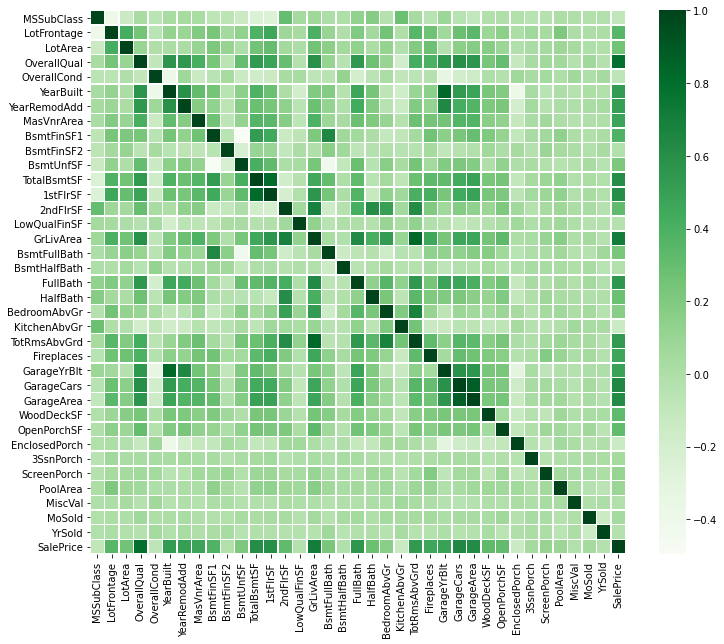

In [5]:
# find the correlation between columns
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.corr(), ax = ax, linewidths=.5, cmap="Greens")

<AxesSubplot:>

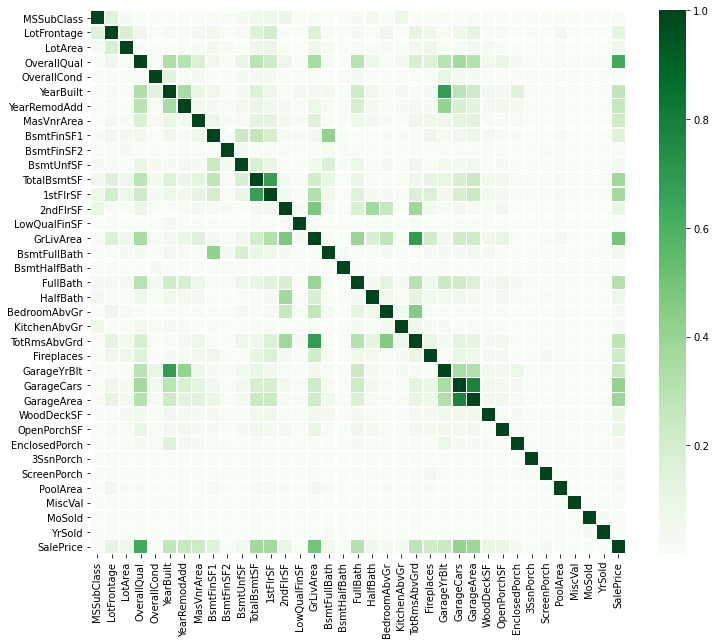

In [6]:
# find the correlation between columns
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.corr()**2, ax = ax, linewidths=.5, cmap="Greens")

<AxesSubplot:>

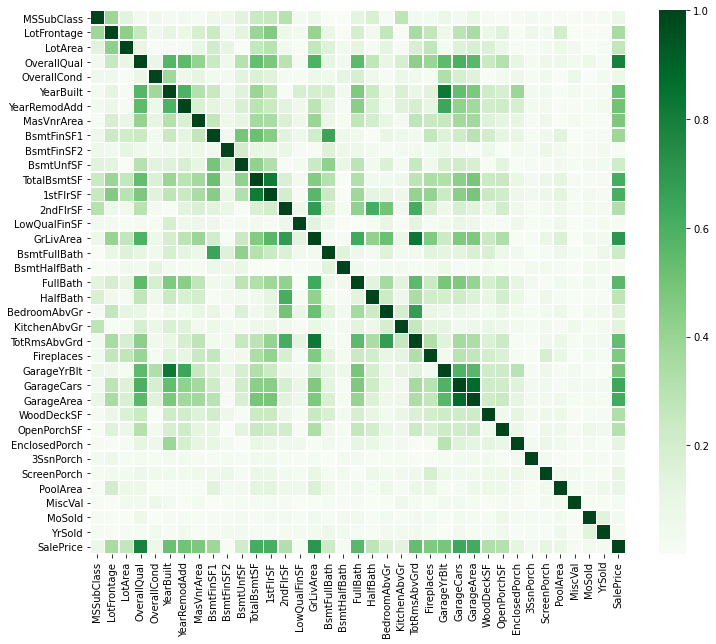

In [7]:
# find the correlation between columns
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(abs(df.corr()), ax = ax, linewidths=.5, cmap="Greens")

In [8]:
df.shape


(1460, 80)

In [9]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
dir(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

['__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [12]:
# Drop the columns that have too many null values 
#(which are not useful data for what we're trying to predict)
#Threshold > 1000

df.count()>1000



MSSubClass       True
MSZoning         True
LotFrontage      True
LotArea          True
Street           True
                 ... 
MoSold           True
YrSold           True
SaleType         True
SaleCondition    True
SalePrice        True
Length: 80, dtype: bool

In [13]:
# Select only the column names that contain over 1000 values.

#columns==True is >1000
columns = df.count()>1000
columns_true = columns[columns==True].index
len(columns_true)


75

In [14]:
# Collect the index of the selected column names.
columns_true

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [15]:
#pick a subset of data columns (>1000) from df

df_low_null_columns = df[columns_true]
df_low_null_columns

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [16]:
df_low_null_columns.shape

(1460, 75)

In [17]:
#Part 2
#check correlation again using updated dataset (df_low_null_columns)
#check only between low null columns and sale price

#select all columns, excluding "y"
df_no_y = df_low_null_columns.loc[:,df_low_null_columns.columns != 'SalePrice']
df_no_y


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal


In [18]:
#find correlation
df_no_y.corrwith(df_low_null_columns['SalePrice'])
#use absolute values
correlations = abs(df_no_y.corrwith(df_low_null_columns['SalePrice']))
correlations

MSSubClass       0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond      0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2       0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF     0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath     0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch    0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal          0.021190
MoSold           0.046432
YrSold           0.028923
dtype: float64

In [19]:
#drop correlations lower than 0.05

columns = correlations>0.05
columns_low_corr = columns[columns==False].index
len(columns_low_corr)

7

In [20]:
#drop low corr columns from the low null columns dataframe

df_low_null_columns.drop(columns_low_corr, axis=1)

df_high_corr = df_low_null_columns.drop(columns_low_corr, axis=1)
df_high_corr.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,61,0,0,0,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,298,0,0,0,0,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,42,0,0,0,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,0,35,272,0,0,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,192,84,0,0,0,WD,Normal,250000


In [21]:
df_high_corr.shape

(1460, 68)

In [22]:
numeric_columns = df_high_corr.select_dtypes(exclude=object).columns
pdf = df_high_corr[numeric_columns].copy()
pdf['SalePrice'] = df['SalePrice']

/Users/wolfey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/wolfey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/wolfey/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

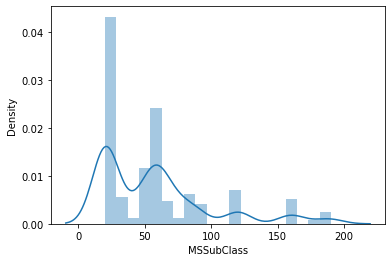

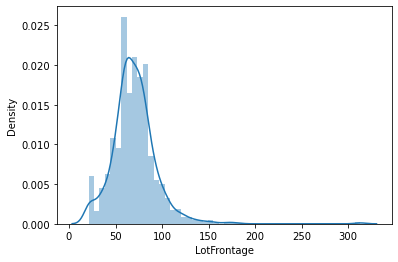

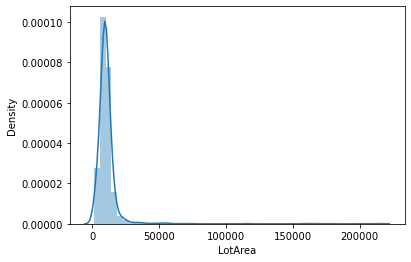

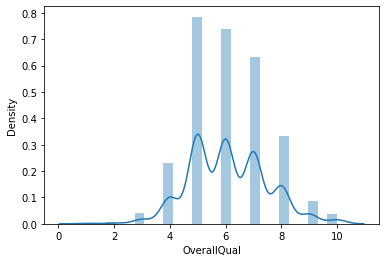

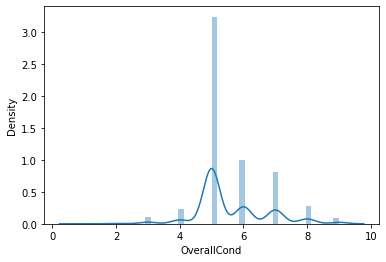

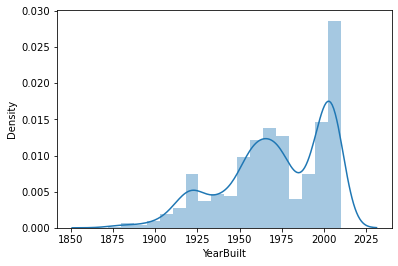

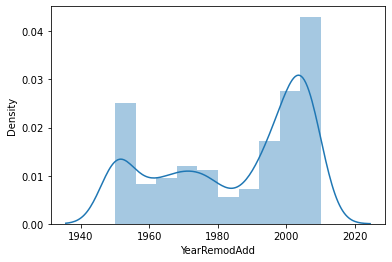

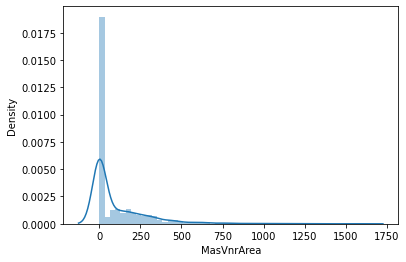

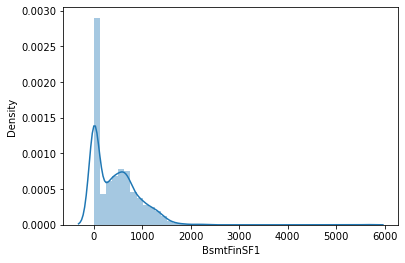

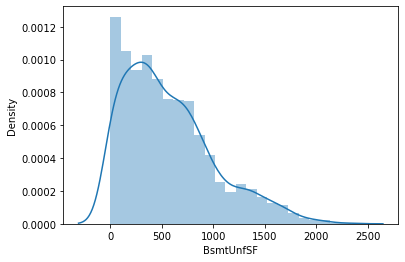

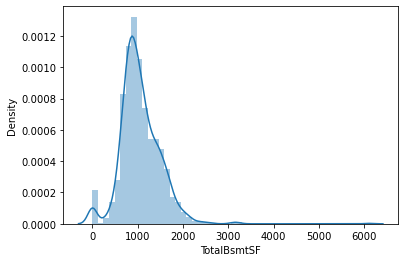

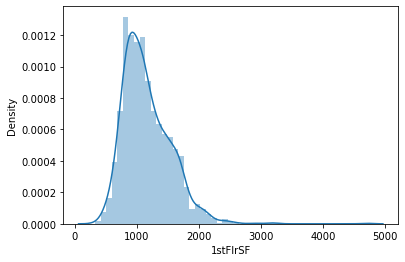

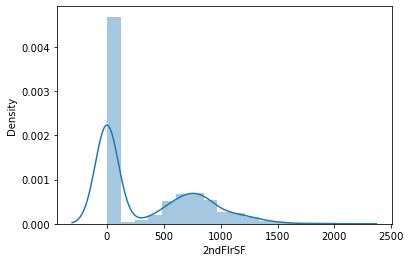

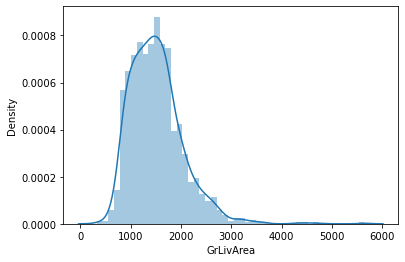

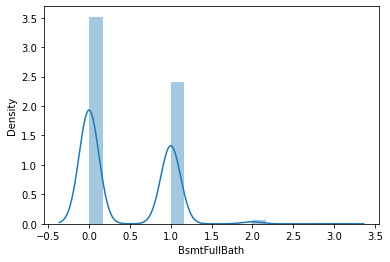

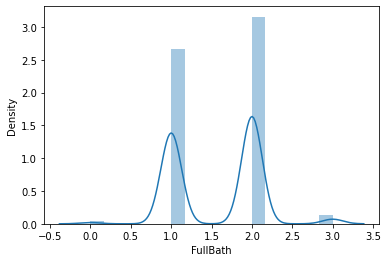

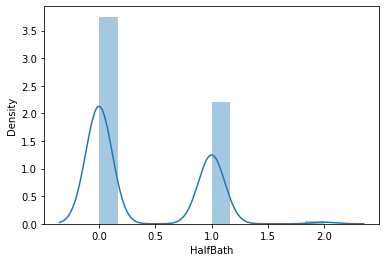

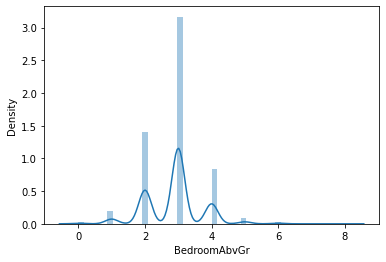

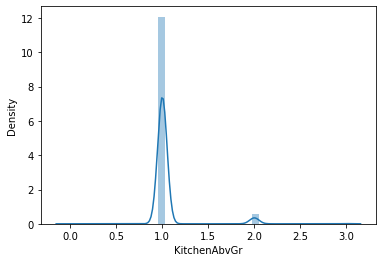

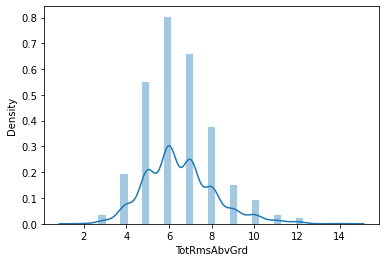

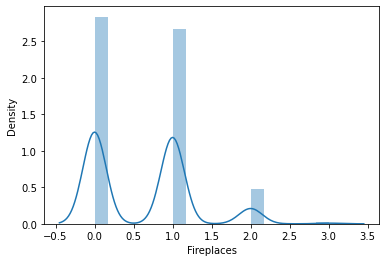

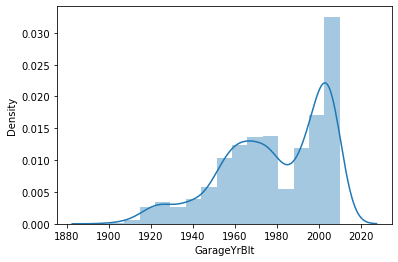

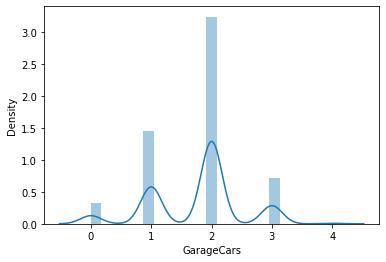

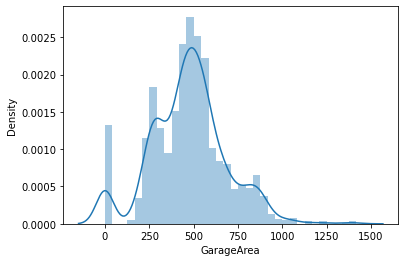

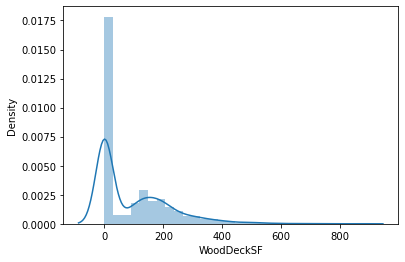

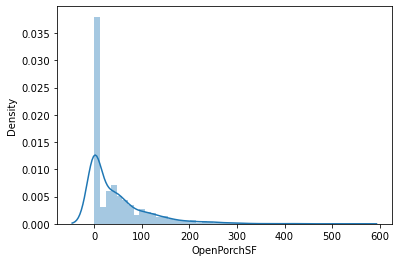

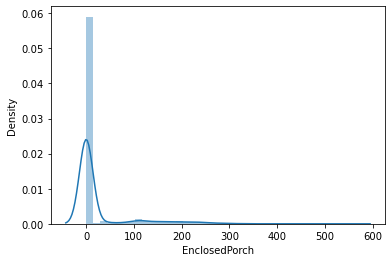

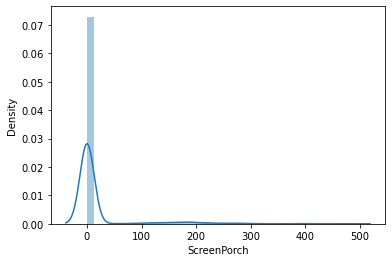

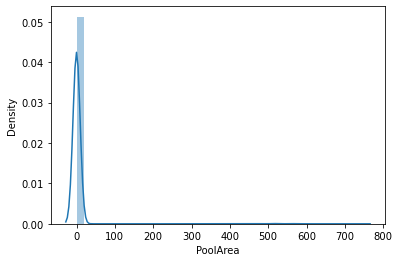

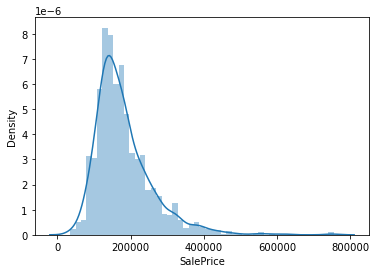

In [23]:
for i, col in enumerate(pdf.columns):
    plt.figure(i)
    sns.distplot(pdf[col])

In [24]:
# based on the above, I've decided to cut off the lotArea above 50,000
desported = df_high_corr[df_high_corr.LotArea < 50000].reset_index(drop=True).copy()
desported

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,61,0,0,0,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,298,0,0,0,0,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,42,0,0,0,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,0,35,272,0,0,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,192,84,0,0,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,40,0,0,0,WD,Normal,175000
1445,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,349,0,0,0,0,WD,Normal,210000
1446,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,60,0,0,0,WD,Normal,266500
1447,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,366,0,112,0,0,WD,Normal,142125


In [25]:
desported.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'PoolArea', 

In [26]:
#2. dummification
#3. train/ test split

#4. Machine Learn 

In [27]:
# in pandas, string is "object";
# Select only columns with "object" data type (categorical)

desported.select_dtypes(include=object).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
#next step:  categorical / dummification
#1. groupBy average sales / drop single level categorical columns

# in pandas, string is "object";




#select object is to select strings, which is to select category columns
category_columns = desported.select_dtypes(include=object).columns

#c represents an element in category_columns.
#groupBy each column to see the average SalePrice
for c in category_columns:
    print(desported.groupby(c).mean()['SalePrice'])
    print()








MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         190039.297368
RM         126316.830275
Name: SalePrice, dtype: float64

Street
Grvl    110438.600000
Pave    180326.040859
Name: SalePrice, dtype: float64

LotShape
IR1    205518.279749
IR2    229085.621622
IR3    203170.625000
Reg    164754.818378
Name: SalePrice, dtype: float64

LandContour
Bnk    142550.114754
HLS    225203.062500
Low    179889.655172
Lvl    180183.746758
Name: SalePrice, dtype: float64

Utilities
AllPub    180114.292818
NoSeWa    137500.000000
Name: SalePrice, dtype: float64

LotConfig
Corner     181300.042308
CulDSac    218548.155556
FR2        177934.574468
FR3        208475.000000
Inside     176468.345420
Name: SalePrice, dtype: float64

LandSlope
Gtl    179822.678986
Mod    188093.754098
Sev    164247.500000
Name: SalePrice, dtype: float64

Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    19986

In [29]:
#check how many levels (sub categories) are in each column:

# for c in category_columns:

#find level from each column:
#test the first column first:
c = category_columns[0]
average_price = desported.groupby(c).mean()['SalePrice']
average_price

    

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         190039.297368
RM         126316.830275
Name: SalePrice, dtype: float64

In [30]:
average_price = desported.groupby(c).mean()['SalePrice']
average_price.size

5

In [31]:
#find level from each column:

single_level_columns=[]

for c in category_columns:
    average_price = df.groupby(c).mean()['SalePrice']
    levels = average_price.size
    print (c, levels)
    
    if levels == 1:
        single_level_columns.append(c)
        
single_level_columns

MSZoning 5
Street 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinType2 6
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 7
GarageType 6
GarageFinish 3
GarageQual 5
GarageCond 5
PavedDrive 3
SaleType 9
SaleCondition 6


[]

In [32]:
#estimate correlation w/ price
# test first column first

c = category_columns[0]
average_price = df.groupby(c).mean()['SalePrice']

#correlation check 
average_price.min()/average_price.max()


0.3482388001248516

In [33]:
#estimate correlation w/ price

#category = cat

low_corr_cat_columns=[]

for c in category_columns:
    average_price = df.groupby(c).mean()['SalePrice']
    correlation = 1 - average_price.min()/average_price.max()
    print (c, correlation)
    
    if correlation < 0.15:
        low_corr_cat_columns.append(c)

low_corr_cat_columns

MSZoning 0.6517611998751485
Street 0.28123384898113735
LotShape 0.31304463083377465
LandContour 0.3819304445599666
Utilities 0.24012559857876126
LotConfig 0.20958499814323783
LandSlope 0.11949566064743689
Neighborhood 0.7060010517035549
Condition1 0.4019184652278178
Condition2 0.7023076923076923
BldgType 0.308626045740793
HouseStyle 0.49931818181818177
RoofStyle 0.33818181818181814
RoofMatl 0.6489429852658553
Exterior1st 0.7290076335877862
Exterior2nd 0.670846394984326
MasVnrType 0.44906969822907317
ExterQual 0.7604938371316232
ExterCond 0.6200331125827815
Foundation 0.5233076664616949
BsmtQual 0.6462461466498062
BsmtCond 0.7003744023513695
BsmtExposure 0.357163954220024
BsmtFinType1 0.37603786193688515
BsmtFinType2 0.2802730075960791
Heating 0.601694737531086
HeatingQC 0.5951877203211884
CentralAir 0.4346316461237275
Electrical 0.6413758361776507
KitchenQual 0.6786982052995774
Functional 0.532244458551154
GarageType 0.5683557972961565
GarageFinish 0.4078115811215719
GarageQual 0.58437

['LandSlope']

In [34]:
desported["ExterQual"].value_counts()

TA    900
Gd    485
Ex     50
Fa     14
Name: ExterQual, dtype: int64

In [35]:
# dummification

dummified_df = pd.get_dummies(desported.drop(['LandSlope'], axis = 1), drop_first=True)
dummified_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,150,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,284,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,434,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,540,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,490,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,60,62.0,7917,6,5,1999,2000,0.0,0,953,...,0,0,0,0,1,0,0,0,1,0
1445,20,85.0,13175,6,6,1978,1988,119.0,790,589,...,0,0,0,0,1,0,0,0,1,0
1446,70,66.0,9042,7,9,1941,2006,0.0,275,877,...,0,0,0,0,1,0,0,0,1,0
1447,20,68.0,9717,5,6,1950,1996,0.0,49,0,...,0,0,0,0,1,0,0,0,1,0


In [36]:
#check NA
#if column is NA, show True.
#if column is not NA, show False.

dummified_df.isna()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1445,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1446,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1447,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
#find columns w/ null values
dummified_df.isna().sum().sort_values(ascending= False)

LotFrontage              253
GarageYrBlt               81
MasVnrArea                 8
MSSubClass                 0
BsmtQual_TA                0
                        ... 
Condition2_Feedr           0
Condition2_Norm            0
Condition2_PosA            0
Condition2_PosN            0
SaleCondition_Partial      0
Length: 223, dtype: int64

In [38]:
# LotFrontage
# GarageYrBlt
# MasVnrArea 


# avg
mean = dummified_df["LotFrontage"].mean()

#NA refill (replace NA by average)

dummified_df["LotFrontage"] = dummified_df["LotFrontage"].fillna(value=mean)

# # ----------------------------

# # avg
yr_blt_mean = round(dummified_df["GarageYrBlt"].mean())

# #NA refill (replace NA by average)

dummified_df["GarageYrBlt"] = dummified_df["GarageYrBlt"].fillna(value=yr_blt_mean)
dummified_df["GarageYrBlt"] 

# #----------------------------------
# #drop # MasVnrArea 

dummified_df = dummified_df.dropna(subset=["MasVnrArea"])
dummified_df


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,150,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,284,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,434,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,540,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,490,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,60,62.0,7917,6,5,1999,2000,0.0,0,953,...,0,0,0,0,1,0,0,0,1,0
1445,20,85.0,13175,6,6,1978,1988,119.0,790,589,...,0,0,0,0,1,0,0,0,1,0
1446,70,66.0,9042,7,9,1941,2006,0.0,275,877,...,0,0,0,0,1,0,0,0,1,0
1447,20,68.0,9717,5,6,1950,1996,0.0,49,0,...,0,0,0,0,1,0,0,0,1,0


In [39]:
dummified_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,150,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,284,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,434,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,540,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,490,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,60,62.0,7917,6,5,1999,2000,0.0,0,953,...,0,0,0,0,1,0,0,0,1,0
1445,20,85.0,13175,6,6,1978,1988,119.0,790,589,...,0,0,0,0,1,0,0,0,1,0
1446,70,66.0,9042,7,9,1941,2006,0.0,275,877,...,0,0,0,0,1,0,0,0,1,0
1447,20,68.0,9717,5,6,1950,1996,0.0,49,0,...,0,0,0,0,1,0,0,0,1,0


In [40]:
# Machine Learning

In [41]:
#Double check agagin if there's column with null values
dummified_df.isna().sum().sort_values(ascending= False)

MSSubClass               0
BsmtQual_TA              0
ExterCond_Fa             0
ExterCond_Gd             0
ExterCond_Po             0
                        ..
Condition2_Feedr         0
Condition2_Norm          0
Condition2_PosA          0
Condition2_PosN          0
SaleCondition_Partial    0
Length: 223, dtype: int64

In [42]:
#
X = dummified_df.drop(columns="SalePrice")

# take out y

y = dummified_df["SalePrice"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X.reset_index(drop=True), y.reset_index(drop=True), test_size=0.2, random_state=42)

In [44]:
#Linear Regression

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train/fit the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)

# The root mean squared error
print("Root mean squared error: %.2f" % (mean_squared_error(y_test, y_pred))**0.5)

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))



Coefficients: 
 [ 7.72564424e+01  6.20579171e+01  1.64553495e+00  7.23040500e+03
  6.61927905e+03  4.49409165e+02  9.81968452e+01  1.48698702e+01
  1.01743853e+01 -8.32450333e+00  3.32113595e+01  2.55239468e+01
  4.65576454e+01  2.74402697e+01  1.20663630e+03  4.31935148e+03
 -9.23817372e+02 -5.51718454e+03 -1.13219841e+04  9.03232189e+02
  1.81265552e+03  2.47166374e+01  3.68328293e+03  7.22404206e+00
  1.16581687e+01  1.48239707e+01  5.00504886e+00  3.25304000e+01
  1.22772049e+02  3.50803776e+04  2.37658611e+04  2.05543408e+04
  1.75036363e+04  5.75163049e+04 -3.94174273e+03 -6.76294477e+03
  2.72441335e+03  4.99094585e+03 -1.48898061e+04  2.21082793e+02
  7.96996045e+02  6.62446985e+03 -9.39539100e+03 -2.56497358e+04
 -8.69530407e+02  2.43717894e+03  9.61594644e+03  1.81313411e+03
 -2.09802040e+04 -9.67946326e+03  1.60555738e+04 -1.42454254e+04
 -1.04569645e+04  1.07761501e+03  5.28748842e+03 -2.07664649e+04
 -1.08665524e+04  1.35917596e+04 -1.54910467e+04  1.83587422e+04
  1.16251

In [45]:
dummified_df.columns


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=223)

In [46]:
# Find out the most important features, retrain the model using those features only.
# Use coefficient to find out the most important features.




In [47]:
# The coefficients  (numpy array)

# Comment out below for now:
coefficient = regr.coef_
coefficient


array([ 7.72564424e+01,  6.20579171e+01,  1.64553495e+00,  7.23040500e+03,
        6.61927905e+03,  4.49409165e+02,  9.81968452e+01,  1.48698702e+01,
        1.01743853e+01, -8.32450333e+00,  3.32113595e+01,  2.55239468e+01,
        4.65576454e+01,  2.74402697e+01,  1.20663630e+03,  4.31935148e+03,
       -9.23817372e+02, -5.51718454e+03, -1.13219841e+04,  9.03232189e+02,
        1.81265552e+03,  2.47166374e+01,  3.68328293e+03,  7.22404206e+00,
        1.16581687e+01,  1.48239707e+01,  5.00504886e+00,  3.25304000e+01,
        1.22772049e+02,  3.50803776e+04,  2.37658611e+04,  2.05543408e+04,
        1.75036363e+04,  5.75163049e+04, -3.94174273e+03, -6.76294477e+03,
        2.72441335e+03,  4.99094585e+03, -1.48898061e+04,  2.21082793e+02,
        7.96996045e+02,  6.62446985e+03, -9.39539100e+03, -2.56497358e+04,
       -8.69530407e+02,  2.43717894e+03,  9.61594644e+03,  1.81313411e+03,
       -2.09802040e+04, -9.67946326e+03,  1.60555738e+04, -1.42454254e+04,
       -1.04569645e+04,  

In [48]:
coefficient.size # Comment out below for now:)

222

In [49]:
# Find the max and min for each columns  (panda series)
# (max - min)

# Comment out below for now:
range_ = X_train.max() - X_train.min()

In [50]:
# coefficient / range = normalized coefficient

# Comment out below for now:
normalized_coefficient = coefficient / range_
normalized_coefficient

MSSubClass                   0.454450
LotFrontage                  0.212527
LotArea                      0.000036
OverallQual                803.378333
OverallCond                945.611293
                             ...     
SaleCondition_AdjLand    32527.383133
SaleCondition_Alloca     19168.111815
SaleCondition_Family     -6239.820125
SaleCondition_Normal      7352.593369
SaleCondition_Partial    -6148.514223
Length: 222, dtype: float64

In [51]:
# Find ranking of normalized coefficient, use the top ones for new training model.

# Comment out below for now:
#make it absolute value to compare
features_important = normalized_coefficient.abs().sort_values(ascending = False)

In [52]:
# features_important
# Comment out below for now:

In [53]:
#take out inf columns (inf = 0 coefficient after normalization)
# Comment out below for now:
features_important.replace([np.inf, -np.inf], np.nan).dropna(axis=0)


Condition2_PosN        494755.236829
Condition2_RRAe         90959.948638
RoofMatl_WdShngl        84801.105037
RoofStyle_Shed          69628.042233
Exterior1st_ImStucc     61698.656977
                           ...      
GrLivArea                   0.006320
GarageArea                  0.005197
BsmtFinSF1                  0.004502
BsmtUnfSF                   0.003564
LotArea                     0.000036
Length: 221, dtype: float64

In [54]:
# Select the top 10 co-efficient columns
# Comment out below for now:
important_columns_top10 = ["RoofMatl", "Condition2", "GarageQual", "SaleType", "Exterior2nd", "Exterior1st", "SaleCondition", "RoofStyle", "Functional", "Neighborhood"]
important_columns_top10

['RoofMatl',
 'Condition2',
 'GarageQual',
 'SaleType',
 'Exterior2nd',
 'Exterior1st',
 'SaleCondition',
 'RoofStyle',
 'Functional',
 'Neighborhood']

In [55]:
# Retrain model
# use only 10 variables instead of the original 223 variables.

# Comment out below for now:
# h = header
retrain_columns = []
for c in X_train.columns:
    for h in important_columns_top10:
        if c.startswith(h+"_"):
            retrain_columns.append(c)

retrain_columns

['Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm'

In [56]:
# Retrain Model

#Linear Regression

# # Create linear regression object
retrain_regr = linear_model.LinearRegression()

# # Train/fit the model using the training sets
retrain_regr.fit(X_train[retrain_columns], y_train)

# # Make predictions using the testing set
y_pred = retrain_regr.predict(X_test[retrain_columns])

# # The coefficients
print("Retrain Coefficients: \n", retrain_regr.coef_)

# # The root mean squared error
print("Root mean squared error: %.2f" % (mean_squared_error(y_test, y_pred))**0.5)

# # The coefficient of determination: 1 is perfect prediction
print("Retrain Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Retrain Coefficients: 
 [-3.16164668e+04 -5.65575264e+04 -2.68360257e+04  3.14676712e+04
  1.38968241e+04  4.01891982e+04 -3.51741329e+04  1.44473265e+04
 -5.45343566e+04 -1.22989755e+05 -1.71035300e+04 -2.42568644e+04
 -2.40026963e+04  2.07613031e+04  1.56746768e+05  1.16077943e+05
 -3.69481788e+04 -9.07926372e+03 -2.95826141e+04  2.13567520e+04
  3.03516985e+04  9.94519732e+04  5.12959200e+04  4.73017709e+04
  1.16884831e+03  1.33527105e+04  1.94255276e+05 -6.07575351e+04
  2.13585718e+04 -4.93825097e+04  1.96883104e+04 -1.37432821e+04
  1.39287993e+04  1.37344049e+04  8.60785705e+03  3.63806967e+04
  2.56763605e+04 -2.66602098e+04  1.61801087e+04  4.10289492e+04
  1.69638229e+04  2.43167721e+05  3.12326934e+03 -9.44789791e+04
  3.59031500e+04 -5.13673392e+15 -6.61709592e+03 -1.51068583e+04
 -1.56585040e+05  1.24732976e+04 -5.64860503e+03  6.45458396e+04
  1.61572916e+04 -2.77241905e+04  5.61228676e+03  2.26712992e+03
 -1.00293605e+04  3.35759953e+04 -4.50744270e+03  5.13673392e+15
 

In [57]:
# input random number set for the top 10



In [59]:
important_columns_top10.

AttributeError: 'list' object has no attribute 'nunique'

In [58]:
pickle.dump(retrain_regr, open('model.pkl', 'wb'))